<a href="https://colab.research.google.com/github/igquinteroch/deep-learning-coursework/blob/main/A2c_DL_TC5033_A01794419.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TC 5033
## Deep Learning
## Transfer Learning
### Activity 2c: Exploring Transfer Learning with CIFAR-10
<br>

### Objective:

In this activity, you'll study the concept of Transfer Learning, a powerful technique to improve the performance of your models by leveraging pre-trained architectures. The provided notebook offers a complete solution using a specific pre-trained model on the CIFAR-10 dataset. Your task is to extend this by trying out two other pre-trained models.
    
### Instructions:

This activity should be submitted in the same format as previous activities. Remember to include the names of all team members in a markdown cell at the beginning of the notebook. The grade obtained in this notebook will be averaged with that of Activity 2b, for the grade of Activity 2.    

* Study the Provided Code: The provided notebook has a complete Transfer Learning solution using a particular pre-trained model. Make sure you understand the flow of the code and the role of each component.

* Select Two Other Pre-trained Models: Choose two different pre-trained models available in PyTorch's model zoo.

* Apply Transfer Learning: Add cells to implement Transfer Learning using the two models you've chosen. Train these models on the CIFAR-10 dataset.

* Evaluation: After training, evaluate your models' performance. Compare the results with the provided solution and try to interpret why there might be differences.

* Documentation: In a markdown cell, summarize your findings. Include any challenges you faced, how you overcame them, and any interesting insights you gained from comparing the different pre-trained models.

### Note:

Although the provided code serves as a guide, you're encouraged to implement the new solutions on your own. The goal is to reinforce your understanding of Transfer Learning and how to apply it effectively.


### Import the libraries and set the stage

We beging by importing fundamental Python libraries required for data processing, deep learning, and visualization.

* `os`: Allows interaction with the OS - e.g., directory navigation.
* `numpy`: Performs mathematical operations on large arrays or matrices.
* `matplotlib.pyplot`: Used for plotting data.

**PyTorch**

* `torch`: Fundamental PyTorch library.
* `torch.nn`: The module `torch.nn` contains classes and functions for building neural networks.
* `torch.nn.functional`: Imports the `torch.nn` module, which contains functions that operate on tensors.
* `from torch.utils.data import DataLoader`: Imports the `DataLoader` class, which is used to load data efficiently in batches during training and evaluation.
* `from torch.utils.data import sampler`: Imports tools for creating data samplers.
* `torchvision.datasets`: Imports the `datasets` module from torchvision, which is an easy access to common datasets such as CIFAR-10.
* `torchvision.transforms`: Imports the `transforms` from torchvision. Provides various transformations to apply for the data such as resizing, croppign, flipping and normalization.
* `from torchvision import models`: Imports the `models` module that contains a collection of pre-trained models for image classification.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
from torchvision import models

# Provides access to the Drive from within the notebook
from google.colab import drive

# Mounts the Drive into the Colab environment
drive.mount("/content/drive")

# Changes the current working directory to the specified path in Google Drive.
os.chdir("/content/drive/MyDrive/TC5033.10")

DATA_PATH = '/content/drive/MyDrive/TC5033.10/cifar-10-batches-py'

Mounted at /content/drive


### Download Cifar10 dataset

This section is about downloading the CIFAR-10 dataset, which is a standard dataset for image classification, and prepares it for training and validation.

It also divides the dataset into training, validation, and testing sets, applies necessary transformations to the images, and creates DataLoaders to efficiently feed the data into a deep learning model during training and evaluation.

In [ ]:
# Number of images used for the training process
NUM_TRAIN = 45000
MINIBATCH_SIZE = 64 # images processed at a time during training

# Data Transformation

transform_imagenet = T.Compose([
                T.Resize(224),
                T.ToTensor(),
                T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) # [mean values, std values]
            ])

transform_cifar = T.Compose([
                T.ToTensor(),
                # Known values for the cifar10 dataset
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261]) # [mean values, std values]
            ])

# Training Dataset and DataLoader Creation

cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_imagenet)

train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

# Validation Dataset and DataLoader Creation

cifar10_val = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                           transform=transform_imagenet)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(cifar10_val))))

# Testing Dataset and DataLoader Creation

cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_imagenet)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Showing the results

for i, (x, y) in enumerate(val_loader):
    print(i, x.shape, y.shape)

0 torch.Size([64, 3, 224, 224]) torch.Size([64])
1 torch.Size([64, 3, 224, 224]) torch.Size([64])
2 torch.Size([64, 3, 224, 224]) torch.Size([64])
3 torch.Size([64, 3, 224, 224]) torch.Size([64])
4 torch.Size([64, 3, 224, 224]) torch.Size([64])
5 torch.Size([64, 3, 224, 224]) torch.Size([64])
6 torch.Size([64, 3, 224, 224]) torch.Size([64])
7 torch.Size([64, 3, 224, 224]) torch.Size([64])
8 torch.Size([64, 3, 224, 224]) torch.Size([64])
9 torch.Size([64, 3, 224, 224]) torch.Size([64])
10 torch.Size([64, 3, 224, 224]) torch.Size([64])
11 torch.Size([64, 3, 224, 224]) torch.Size([64])
12 torch.Size([64, 3, 224, 224]) torch.Size([64])
13 torch.Size([64, 3, 224, 224]) torch.Size([64])
14 torch.Size([64, 3, 224, 224]) torch.Size([64])
15 torch.Size([64, 3, 224, 224]) torch.Size([64])
16 torch.Size([64, 3, 224, 224]) torch.Size([64])
17 torch.Size([64, 3, 224, 224]) torch.Size([64])
18 torch.Size([64, 3, 224, 224]) torch.Size([64])
19 torch.Size([64, 3, 224, 224]) torch.Size([64])
20 torch.S

### Use GPUs

To check if a GPU is available, if not, use a CPU.

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(f"The device used is: {device}")

The device used is: cuda


### Show Images

Randomly select and display an image and its label from the dataset.

In [ ]:
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def plot_figure(image):
  # Rearrange the dimensions of the image array to match the expected format
    plt.imshow(image.permute(1,2,0))
    plt.axis('off')
    plt.show()

The image shown represents a/an: Horse


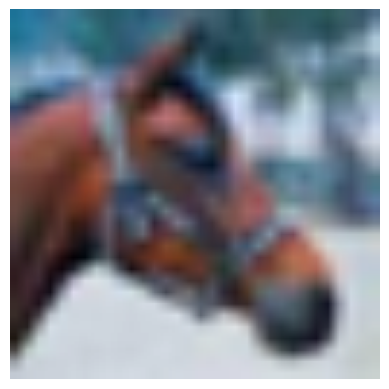

In [ ]:
# Generate a random index within the range of the available batches
rnd_sample_idx = np.random.randint(len(test_loader))
print(f'The image shown represents a/an: {classes[test_loader.dataset[rnd_sample_idx][1]]}')

# Retrieve the actual image
image = test_loader.dataset[rnd_sample_idx][0]

# Normalize the pixel values of the image to a range between 0 and 1

# It is helpful for displaying correct images and improve performance
image = (image - image.min()) / (image.max() -image.min() )

# Plot the image
plot_figure(image)

### Calculate accuracy

**Accuracy** is a metric that measures the proportion of correctly classified instances out of the total number of instances.

Tn this context, represents the proportion of correctly classified images out of the total number of images evaluated.

In [ ]:
def accuracy(model, loader):
    num_correct = 0
    num_total = 0
    # Set the model to evaluation mode
    model.eval()
    # Move the model to the specified device
    model = model.to(device=device)
    # Disable gradient calculation during the evaluation process
    with torch.no_grad():
      # xi : input data (images)
      # yi : labels or targets
        for xi, yi in loader:
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            # The model makes predictions
            scores = model(xi)
            # Extract the predicted labels from the scores
            _, pred = scores.max(dim=1)
            num_correct += (pred == yi).sum()
            num_total += pred.size(0)
        return float(num_correct)/num_total

## ResNet18 model

### Upload Pretrained model

In [ ]:
model_resnet18 = models.resnet18(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 188MB/s]


### Exploring the model

In [ ]:
for i, w in enumerate(model_resnet18.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 3, 3]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([64, 64, 3, 3]) True
7 torch.Size([64]) True
8 torch.Size([64]) True
9 torch.Size([64, 64, 3, 3]) True
10 torch.Size([64]) True
11 torch.Size([64]) True
12 torch.Size([64, 64, 3, 3]) True
13 torch.Size([64]) True
14 torch.Size([64]) True
15 torch.Size([128, 64, 3, 3]) True
16 torch.Size([128]) True
17 torch.Size([128]) True
18 torch.Size([128, 128, 3, 3]) True
19 torch.Size([128]) True
20 torch.Size([128]) True
21 torch.Size([128, 64, 1, 1]) True
22 torch.Size([128]) True
23 torch.Size([128]) True
24 torch.Size([128, 128, 3, 3]) True
25 torch.Size([128]) True
26 torch.Size([128]) True
27 torch.Size([128, 128, 3, 3]) True
28 torch.Size([128]) True
29 torch.Size([128]) True
30 torch.Size([256, 128, 3, 3]) True
31 torch.Size([256]) True
32 torch.Size([256]) True
33 torch.Size([256, 256, 3, 3]) True
34 torch.Size([25

In [ ]:
model_resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Adjusting and Training the model ResNet18

In [ ]:
model_aux = nn.Sequential(*list(model_resnet18.children()))
model_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [ ]:
model_aux = nn.Sequential(*list(model_resnet18.children())[:-1])

In [ ]:
model_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [ ]:
for i, parameter in enumerate(model_aux.parameters()):
    parameter.requires_grad = False

In [ ]:
for i, parameter in enumerate(model_aux.parameters()):
    print(i, parameter.requires_grad)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False


Below we define the training process for the model.

The `train` function processes batches of the data, calculate the loss, update model's parameters to minimize the loss, and tracks the performance on a validation test.

In [ ]:
def train(model, optimiser, epochs=100):
    model = model.to(device=device)
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader):
            model.train()
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            # Calculate the loss or cost function using cross-entropy
            cost = F.cross_entropy(input= scores, target=yi)
            # Reset the gradients to zero before calculate new gradients
            optimiser.zero_grad()
            # Calculate the gradients of the loss function using backpropagation
            cost.backward()
            # Update parameters
            optimiser.step()

        acc = accuracy(model, val_loader)
#         if epoch%5 == 0:
        print(f'Epoch: {epoch} | Cost Function: {cost.item()} | Accuracy: {acc}')
#         scheduler.step()

In [ ]:
hidden1 = 256 # number of neurons
hidden = 256
lr = 5e-4 # lr : controls how much the parameters are adjusted during each training step
epochs = 3 # number of times the dataset will be passed through the model during the training process

model1 = nn.Sequential(model_aux,
                       nn.Flatten(),
                       nn.Linear(in_features=512, out_features= 10, bias= True))

# Defining the Optimizer
optimiser = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999)) # parameters specific to the Adam optimizer that influence how it calculates the updates for the model's parameters

### Accuracy

In [ ]:
train(model1, optimiser, epochs)

Epoch: 0 | Cost Function: 0.7627898454666138 | Accuracy: 0.7764
Epoch: 1 | Cost Function: 1.0414456129074097 | Accuracy: 0.7926
Epoch: 2 | Cost Function: 0.9539267420768738 | Accuracy: 0.8024


In [ ]:
print(f"Model's Accuracy: {accuracy(model1, test_loader)}")

Model's Accuracy: 0.7975


## RegNet model

The RegNet model was proposed in Designing Network Design Spaces by Ilija Radosavovic, Raj Prateek Kosaraju, Ross Girshick, Kaiming He, Piotr Dollár.

The authors design search spaces to perform Neural Architecture Search (NAS). They first start from a high dimensional search space and iteratively reduce the search space by empirically applying constraints based on the best-performing models sampled by the current search space.

Reference:

Hugging Face. *Transformers documentation: RegNet*. Available at:
https://huggingface.co/docs/transformers/en/model_doc/regnet



### Upload pretrained model

In [ ]:
model_retneg = models.regnet_y_400mf(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RegNet_Y_400MF_Weights.IMAGENET1K_V1`. You can also use `weights=RegNet_Y_400MF_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/regnet_y_400mf-c65dace8.pth" to /root/.cache/torch/hub/checkpoints/regnet_y_400mf-c65dace8.pth
100%|██████████| 16.8M/16.8M [00:00<00:00, 26.8MB/s]


### Exploring the model

In [ ]:
for i, w in enumerate(model_retneg.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([32, 3, 3, 3]) True
1 torch.Size([32]) True
2 torch.Size([32]) True
3 torch.Size([48, 32, 1, 1]) True
4 torch.Size([48]) True
5 torch.Size([48]) True
6 torch.Size([48, 32, 1, 1]) True
7 torch.Size([48]) True
8 torch.Size([48]) True
9 torch.Size([48, 8, 3, 3]) True
10 torch.Size([48]) True
11 torch.Size([48]) True
12 torch.Size([8, 48, 1, 1]) True
13 torch.Size([8]) True
14 torch.Size([48, 8, 1, 1]) True
15 torch.Size([48]) True
16 torch.Size([48, 48, 1, 1]) True
17 torch.Size([48]) True
18 torch.Size([48]) True
19 torch.Size([104, 48, 1, 1]) True
20 torch.Size([104]) True
21 torch.Size([104]) True
22 torch.Size([104, 48, 1, 1]) True
23 torch.Size([104]) True
24 torch.Size([104]) True
25 torch.Size([104, 8, 3, 3]) True
26 torch.Size([104]) True
27 torch.Size([104]) True
28 torch.Size([12, 104, 1, 1]) True
29 torch.Size([12]) True
30 torch.Size([104, 12, 1, 1]) True
31 torch.Size([104]) True
32 torch.Size([104, 104, 1, 1]) True
33 torch.Size([104]) True
34 torch.Size([104]) 

### Training the RegNet model

In [ ]:
model_retneg_aux = nn.Sequential(*list(model_retneg.children())[:-1])

In [ ]:
model_retneg_aux

Sequential(
  (0): SimpleStemIN(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (1): Sequential(
    (block1): AnyStage(
      (block1-0): ResBottleneckBlock(
        (proj): Conv2dNormActivation(
          (0): Conv2d(32, 48, kernel_size=(1, 1), stride=(2, 2), bias=False)
          (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (f): BottleneckTransform(
          (a): Conv2dNormActivation(
            (0): Conv2d(32, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (b): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=6, bias=False)
            (1): Batch

In [ ]:
for i, parameter in enumerate(model_retneg_aux.parameters()):
    parameter.requires_grad = False

In [ ]:
hidden1 = 256
hidden = 256
lr = 5e-4
epochs = 3

model_2 = nn.Sequential(model_retneg_aux,
                       nn.Flatten(),
                       nn.Linear(in_features=440, out_features= 10, bias= True))

optimiser = torch.optim.Adam(model_2.parameters(), lr=lr, betas=(0.9, 0.999))

### Accuracy

In [ ]:
train(model_2, optimiser, epochs)

Epoch: 0 | Cost Function: 0.6282075047492981 | Accuracy: 0.7756
Epoch: 1 | Cost Function: 0.6884537935256958 | Accuracy: 0.79
Epoch: 2 | Cost Function: 1.3043851852416992 | Accuracy: 0.8032


In [ ]:
print(f"Model's Accuracy: {accuracy(model_2, test_loader)}")

Model's Accuracy: 0.7967


## GoogLeNet model

GoogLeNet was based on a deep convolutional neural network architecture codenamed “Inception”, which was responsible for setting the new state of the art for classification and detection in the ImageNet Large-Scale Visual Recognition Challenge 2014 (ILSVRC 2014).

Reference:

PyTorch team. *Googlenet*. Available at:
https://pytorch.org/hub/pytorch_vision_googlenet/



### Upload the model

In [ ]:
model_gnet = models.googlenet(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 167MB/s]


### Exploring the model

In [ ]:
for i, w in enumerate(model_gnet.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 1, 1]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([192, 64, 3, 3]) True
7 torch.Size([192]) True
8 torch.Size([192]) True
9 torch.Size([64, 192, 1, 1]) True
10 torch.Size([64]) True
11 torch.Size([64]) True
12 torch.Size([96, 192, 1, 1]) True
13 torch.Size([96]) True
14 torch.Size([96]) True
15 torch.Size([128, 96, 3, 3]) True
16 torch.Size([128]) True
17 torch.Size([128]) True
18 torch.Size([16, 192, 1, 1]) True
19 torch.Size([16]) True
20 torch.Size([16]) True
21 torch.Size([32, 16, 3, 3]) True
22 torch.Size([32]) True
23 torch.Size([32]) True
24 torch.Size([32, 192, 1, 1]) True
25 torch.Size([32]) True
26 torch.Size([32]) True
27 torch.Size([128, 256, 1, 1]) True
28 torch.Size([128]) True
29 torch.Size([128]) True
30 torch.Size([128, 256, 1, 1]) True
31 torch.Size([128]) True
32 torch.Size([128]) True
33 torch.Size([192, 128, 3, 3]) True
34 torch.Size([192]) 

In [ ]:
model_gnet

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

### Training the model

In [ ]:
model_gnet_aux = nn.Sequential(*list(model_gnet.children())[:-1])

In [ ]:
for i, parameter in enumerate(model_gnet_aux.parameters()):
    parameter.requires_grad = False

In [ ]:
hidden1 = 256
hidden = 256
lr = 5e-4
epochs = 3

model_3 = nn.Sequential(model_gnet_aux,
                       nn.Flatten(),
                       nn.Linear(in_features=1024, out_features= 10, bias= True))

optimiser = torch.optim.Adam(model_3.parameters(), lr=lr, betas=(0.9, 0.999))

### Accuracy

In [ ]:
train(model_3, optimiser, epochs)

Epoch: 0 | Cost Function: 1.0213227272033691 | Accuracy: 0.7784
Epoch: 1 | Cost Function: 0.692040205001831 | Accuracy: 0.7884
Epoch: 2 | Cost Function: 0.7649113535881042 | Accuracy: 0.8004


In [ ]:
print(f"Model's Accuracy: {accuracy(model_3, test_loader)}")

Model's Accuracy: 0.7949
